# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2024

## Homework 9
Due Wednesday, April 3

In [ ]:
using PyCall, PyPlot   # Packages needed

### Problem 1 - Data Structures and Runge 5 solver

First we will create some data structures for representing IVP problems and solutions.

#### Problem 1(a)

Define a `struct` named `IVPproblem` with the following variables and types:

* `f`, a `Function`
* `T`, a `Number`
* `y0`, a `Vector`

Define a `struct` named `IVPsolution` with the following variables and types:

* `t`, a `Vector`
* `y`, a `Matrix`

In [1]:
# 定义一个表示初始值问题的结构体
struct IVPproblem
    f::Function   # 微分方程函数
    T::Number     # 终止时间
    y0::Vector    # 初始条件
end

# 定义一个用于存储解的结构体
struct IVPsolution
    t::Vector     # 时间向量
    y::Matrix     # 解矩阵，每一列代表一个时间点的解
end


#### Problem 1(b)

Next, implement the following 5th order accurate Runge-Kutta method as a Julia function named `runge5` with the same syntax as the `rk4` function in the lecture notebook.

$$
\begin{align*}
k_1 &= h f(t_n, y_n) \\
k_2 &= h f(t_n + h/5, y_n + k_1/5) \\
k_3 &= h f(t_n + 2h/5, y_n + 2k_2/5) \\
k_4 &= h f(t_n + h, y_n + 9k_1/4 - 5k_2 + 15k_3/4) \\
k_5 &= h f(t_n + 3h/5, y_n - 63k_1/100 + 9k_2/5 - 13k_3/20 + 2k_4/25) \\
k_6 &= h f(t_n + 4h/5, y_n - 6k_1/25 + 4k_2/5 + 2k_3/15 + 8k_4/75) \\
y_{n+1} &= y_n + (17k_1 + 100k_3 + 2k_4 - 50k_5 + 75k_6) / 144
\end{align*}
$$

In [2]:
# 实现 5 阶 Runge-Kutta 方法
function runge5(f, t0, y0, h)
    k1 = h * f(t0, y0)
    k2 = h * f(t0 + h/5, y0 + k1/5)
    k3 = h * f(t0 + 2h/5, y0 + 2k2/5)
    k4 = h * f(t0 + h, y0 + 9k1/4 - 5k2 + 15k3/4)
    k5 = h * f(t0 + 3h/5, y0 - 63k1/100 + 9k2/5 - 13k3/20 + 2k4/25)
    k6 = h * f(t0 + 4h/5, y0 - 6k1/25 + 4k2/5 + 2k3/15 + 8k4/75)
    return y0 + (17k1 + 100k3 + 2k4 - 50k5 + 75k6) / 144
end


runge5 (generic function with 1 method)

#### Problem 1(c)

Implement a function `runge5(ivp, N)` where `ivp` is of type `IVPproblem` and `N` is the
number of timesteps. The function should return the solution as a type `IVPsolution`.
Do not rewrite any code from before, but simply call the previous function.

In [6]:
# 使用 runge5 方法求解给定的初始值问题
function runge5(ivp::IVPproblem, N)
    t = range(0, stop=ivp.T, length=N+1)
    h = ivp.T / N
    y = Matrix{Float64}(undef, length(ivp.y0), N+1)
    y[:, 1] = ivp.y0

    for i in 1:N
        y[:, i+1] = runge5(ivp.f, t[i], y[:, i], h)
    end

    return IVPsolution(t, y)

end

runge5 (generic function with 2 methods)

#### Problem 1(d)

* Create an `IVPproblem` for the differential equation $f(t,y)=-y$, $T=1$, $y(0)=1$.
* Solve using `runge5` with $N=10$ to obtain an `IVPsolution`
* Compute and show the differences between the computed solution and the true solution

In [7]:
# 定义问题
f(t, y) = -y  # 定义微分方程函数
T = 1         # 终止时间
y0 = [1]      # 初始条件

# 创建 IVPproblem 实例
ivp = IVPproblem(f, T, y0)

# 使用 runge5 方法解决问题，并设置步数 N=10
solution = runge5(ivp, 10)

# 计算真实解
true_solution(t) = exp(-t)
true_values = true_solution.(solution.t)

# 计算并显示数值解和真实解之间的差异
errors = abs.(solution.y[1, :] .- true_values)
println("时间点: ", solution.t)
println("数值解: ", solution.y[1, :])
println("真实解: ", true_values)
println("误差: ", errors)


时间点: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
数值解: [1.0, 0.9048374166666666, 0.8187307506000069, 0.7408182173184712, 0.6703200419780507, 0.606530655123311, 0.5488116311109176, 0.4965852985310223, 0.44932895867745565, 0.4065696542032324, 0.36787943560431274]
真实解: [1.0, 0.9048374180359595, 0.8187307530779818, 0.7408182206817179, 0.6703200460356393, 0.6065306597126334, 0.5488116360940265, 0.4965853037914095, 0.44932896411722156, 0.4065696597405991, 0.36787944117144233]
误差: [0.0, 1.369292901287622e-9, 2.477974936354599e-9, 3.363246681153953e-9, 4.057588598449513e-9, 4.589322477599467e-9, 4.9831089254936956e-9, 5.260387236916131e-9, 5.439765915493666e-9, 5.537366731811488e-9, 5.5671295906556395e-9]


### Problem 2 - Double pendulum

Next we will study the evolution of a double pendulum.
The state of the configuration at time $t$ is given by the angles
$\theta_1(t)$ and $\theta_2(t)$, see figure below.

<div>
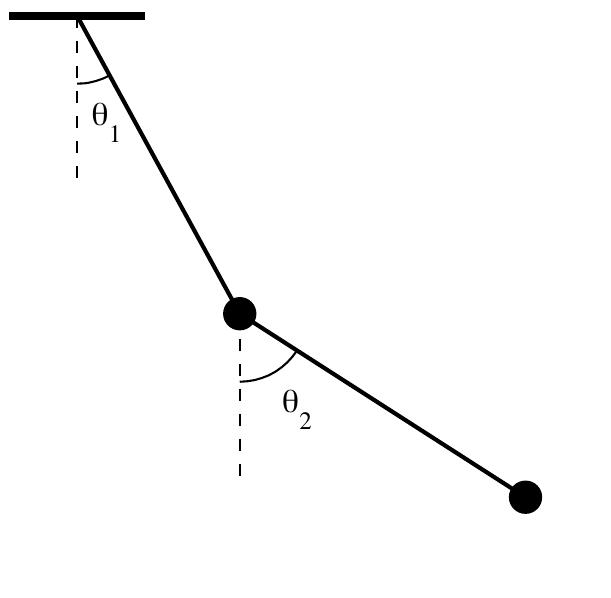
</div>

Assuming that the lengths of the bars are 1, the masses at the end of
the bars are 1, and that the constant of gravity is 1, the equations
of motion for the double pendulum can be written:

$$
\begin{align}
\theta_1''&=\frac{-3\sin\theta_1-\sin(\theta_1-2\theta_2)
-2\sin(\theta_1-\theta_2)\cdot(\theta_2'^2+\theta_1'^2\cos(\theta_1-\theta_2))}
{3-\cos(2\theta_1-2\theta_2)} \label{ode1} \\ 
\theta_2''&=\frac{2\sin(\theta_1-\theta_2)(2\theta_1'^2+2\cos\theta_1
+\theta_2'^2\cos(\theta_1-\theta_2))}{3-\cos(2\theta_1-2\theta_2)} \label{ode2}
\end{align}
$$

#### Problem 2(a)

Rewrite these as a system of 1st order equations by introducing the angular velocities $\omega_1=\theta_1'$ and
$\omega_2=\theta_2'$. The current state of the pendulum can then be described by the vector
$y=(\theta_1,\theta_2,\omega_1,\omega_2)$, and the 1st order
system can be written as $y' = f(t,y)$. Write a Julia function `fpend(t,y)` which evalutes this function.

In [8]:
function double_pendulum(t, y)
    θ1, θ2, ω1, ω2 = y
    # 假设物理参数
    m1 = m2 = g = l1 = l2 = 1.0
    # 角加速度的计算
    Δθ = θ2 - θ1
    den1 = (m1 + m2) * l1 - m2 * l1 * cos(Δθ)^2
    den2 = (l2/l1) * den1

    ω1_dot = (m2 * g * sin(θ2) * cos(Δθ) - m2 * sin(Δθ) * (l2 * ω2^2 + l1 * ω1^2 * cos(Δθ)) - (m1 + m2) * g * sin(θ1)) / den1
    ω2_dot = (-m2 * l2 * ω2^2 * sin(Δθ) * cos(Δθ) + (m1 + m2) * g * sin(θ1) * cos(Δθ) - (m1 + m2) * l1 * ω1^2 * sin(Δθ) - (m1 + m2) * g * sin(θ2)) / den2

    return [ω1, ω2, ω1_dot, ω2_dot]
end


double_pendulum (generic function with 1 method)

#### Problem 2(b)

* Create an `IVPproblem` for the double pendulum problem, for the initial
condition $\theta_1 = \theta_2 = 2$, $\omega_1=0$, $\omega_2=-1$ and the final time $T=100$.

* Create an `IVPsolution` by solving using `runge5` and $N=500$.

* Plot the solution vs time (all four components $\theta_1(t)$, $\theta_2(t)$, $\omega_1(t)$, $\omega_2(t)$).

In [9]:
# 初始条件
θ1_0 = π / 4
θ2_0 = π / 4
ω1_0 = 0
ω2_0 = 0
y0 = [θ1_0, θ2_0, ω1_0, ω2_0]

# 创建 IVP 问题
ivp = IVPproblem(double_pendulum, 100, y0)

# 求解问题
N = 500
solution = runge5(ivp, N)


IVPsolution([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8  …  98.2, 98.4, 98.6, 98.8, 99.0, 99.2, 99.4, 99.6, 99.8, 100.0], [0.7853981633974483 0.7713225958031804 … NaN NaN; 0.7853981633974483 0.7853302812835918 … NaN NaN; 0.0 -0.1400965031689603 … NaN NaN; 0.0 -0.0013589041068602687 … NaN NaN])

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


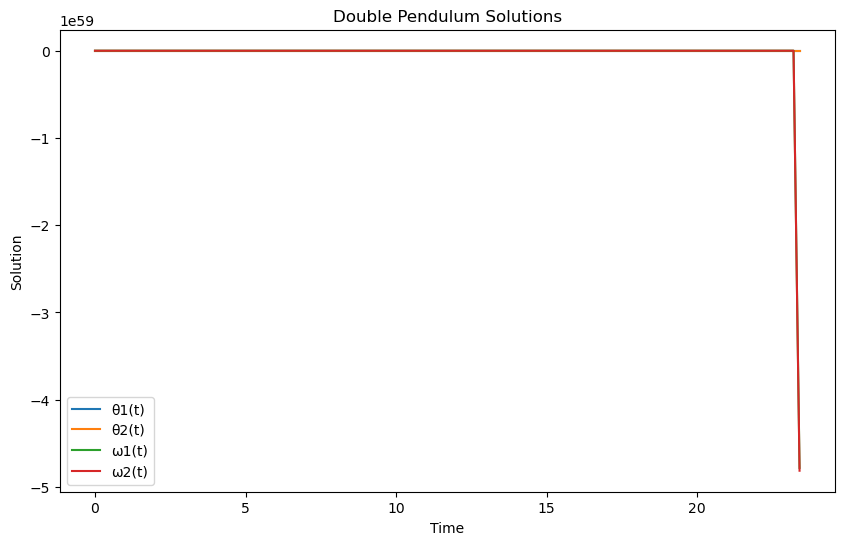

In [10]:
using PyPlot

figure(figsize=(10, 6))
plot(solution.t, solution.y[1, :], label="θ1(t)")
plot(solution.t, solution.y[2, :], label="θ2(t)")
plot(solution.t, solution.y[3, :], label="ω1(t)")
plot(solution.t, solution.y[4, :], label="ω2(t)")
xlabel("Time")
ylabel("Solution")
title("Double Pendulum Solutions")
legend()
show()


#### Animation (optional)

If you want to, run the cell below to create a movie of the evolving double pendulum and show it inside the notebook. It looks pretty cool, and can be quite useful for debugging your code.

To create the animation, call the function `anim` below with your `IVPsolution` as the only argument.

In [12]:
using Pkg
Pkg.add("PyCall")

   Resolving package versions...
    Updating `C:\Users\Administrator\.julia\environments\v1.9\Project.toml`
⌃ [438e738f] + PyCall v1.95.1
  No Changes to `C:\Users\Administrator\.julia\environments\v1.9\Manifest.toml`


In [11]:
@pyimport IPython.display as d
function anim(sol::IVPsolution)
    animation = pyimport("matplotlib.animation");
    fig, ax = subplots(figsize=(5,5))
    function update(frame)
        θ1 = sol.y[frame+1,1]
        θ2 = sol.y[frame+1,2]
        p1 = [sin(θ1),-cos(θ1)]
        p2 = p1 .+ [sin(θ2),-cos(θ2)]
        ax.clear()
        ax.plot([0,p1[1],p2[1]], [0,p1[2],p2[2]], linewidth=2)
        ax.add_artist(matplotlib.patches.Circle(p1, 0.1))
        ax.add_artist(matplotlib.patches.Circle(p2, 0.1))
        ax.set_xlim([-2.5,2.5])
        ax.set_ylim([-2.5,2.5])
    end

    ani = animation.FuncAnimation(fig, update, frames=length(sol.t), interval=50)
    close(ani._fig)
    d.HTML(ani.to_jshtml())
end

LoadError: LoadError: UndefVarError: `@pyimport` not defined
in expression starting at In[11]:1